## Password Strength Classifier 

Goal:the process of guessing the strength of the password entered by users

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv",error_bad_lines=False,sep=",")

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
df.tail()

,password,strength
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1
669639,fxx4pw4g,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [7]:
df.dropna(inplace=True)

<AxesSubplot:>

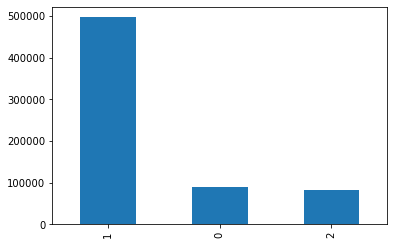

In [8]:
df.strength.value_counts().plot.bar()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [19]:
x,y=df["password"],df["strength"]

In [20]:
x.shape,y.shape

((669639,), (669639,))

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((535711,), (133928,), (535711,), (133928,))

In [39]:
vect=CountVectorizer(analyzer="char")
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [40]:
x_train_dtm.shape,x_test_dtm.shape

((535711, 146), (133928, 146))

In [41]:
m=MultinomialNB()
model=m.fit(x_train_dtm,y_train)
m_predict=m.predict(x_test_dtm)

In [42]:
accuracy_score(y_test,m_predict)

0.7793590585986501

In [43]:
b=BernoulliNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [44]:
accuracy_score(y_test,b_predict)

0.8135714712382773

In [45]:
L=LogisticRegression()
model=L.fit(x_train_dtm,y_train)
L_predict=L.predict(x_test_dtm)

In [46]:
accuracy_score(y_test,L_predict)

0.999805865838361